In [1]:
import pandas as pd
from collections import Counter

ed_df_2023 = pd.read_csv("data/2023-ed-deu-sweep.csv")
ed_df_2023 = ed_df_2023.loc[ed_df_2023["source_attention_heads"] > 1].reset_index()
ed_df_2023["arch_name"] = "encoder-decoder"
print(len(set(ed_df_2023["Name"])))
Counter(ed_df_2023["Name"]).most_common(1)

1


[('deu.trn', 292)]

In [2]:
import pandas as pd
from collections import Counter

ed_df_2017 = pd.read_csv("data/2017-ed-deu-sweep.csv")
ed_df_2017 = ed_df_2017.loc[ed_df_2017["source_attention_heads"] > 1].reset_index()
ed_df_2017["arch_name"] = "encoder-decoder"
print(len(set(ed_df_2017["Name"])))
Counter(ed_df_2017["Name"]).most_common(1)

1


[('german-train-high', 288)]

In [3]:
dec_df_2023 = pd.read_csv("data/2023-decoder-only-deu-sweep.csv")
dec_df_2023 = dec_df_2023.loc[dec_df_2023["source_attention_heads"] > 1].reset_index()
dec_df_2023["arch_name"] = "decoder-only"
print(len(set(dec_df_2023["Name"])))
Counter(dec_df_2023["Name"]).most_common(1)

278


[('lilac-totem-376', 1)]

In [4]:
dec_df_2017 = pd.read_csv("data/2017-decoder-only-deu-sweep.csv")
dec_df_2017 = dec_df_2017.loc[dec_df_2017["source_attention_heads"] > 1].reset_index()
dec_df_2017["arch_name"] = "decoder-only"
print(len(set(dec_df_2017["Name"])))
Counter(dec_df_2017["Name"]).most_common(1)

1


[('german-train-high', 288)]

In [31]:
# dec_2017_range = (dec_df_2017["val_accuracy.max"].min(), dec_df_2017["val_accuracy.max"].max())
# dec_2017_range
import numpy as np
def is_same_config(df1, df2):
    config_feats = [
        "hidden_size", "embedding_size", "decoder_layers",
        "source_attention_heads", "scheduler_kwargs/warmup_steps"
    ]
    return all([df1[f] == df2[f] for f in config_feats])

dec_df_2017["quintile"] = pd.qcut(dec_df_2017["val_accuracy.max"], 5, labels=np.arange(5, 0, -1))
dec_df_2023["quintile"] = pd.qcut(dec_df_2023["val_accuracy.max"], 5, labels=np.arange(5, 0, -1))
ed_df_2017["quintile"] = pd.qcut(ed_df_2017["val_accuracy.max"], 5, labels=np.arange(5, 0, -1))
ed_df_2023["quintile"] = pd.qcut(ed_df_2023["val_accuracy.max"], 5, labels=np.arange(5, 0, -1))

dec_2023_merge = dec_df_2023[[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps",
    "val_accuracy.max", "quintile", "local_run_dir"
]]
dec_2023_merge = dec_2023_merge.rename(columns={
    "val_accuracy.max": "acc_2023",
    "quintile": "quintile_2023",
    "local_run_dir": "local_run_dir_2023"
})
dec_2017_merge = dec_df_2017[[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps",
    "val_accuracy.max", "quintile", "local_run_dir"
]]
dec_2017_merge = dec_2017_merge.rename(columns={
    "val_accuracy.max": "acc_2017",
    "quintile": "quintile_2017",
    "local_run_dir": "local_run_dir_2017"
})
dec_merge = dec_2023_merge.merge(dec_2017_merge, how="inner", on=[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps"
])
dec_merge

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps,acc_2023,quintile_2023,local_run_dir_2023,acc_2017,quintile_2017,local_run_dir_2017
0,1024,512,2,2,4000,0.359,2,/rc_scratch/adwi9965/decoder-only-results/deu....,0.814,3,/rc_scratch/adwi9965/decoder-only-results/germ...
1,1024,512,2,2,2000,0.392,2,/rc_scratch/adwi9965/decoder-only-results/deu....,0.822,3,/rc_scratch/adwi9965/decoder-only-results/germ...
2,512,512,8,8,4000,0.189,3,/rc_scratch/adwi9965/decoder-only-results/deu....,0.916,1,/rc_scratch/adwi9965/decoder-only-results/germ...
3,512,512,8,8,2000,0.188,3,/rc_scratch/adwi9965/decoder-only-results/deu....,0.910,1,/rc_scratch/adwi9965/decoder-only-results/germ...
4,512,512,8,4,4000,0.244,3,/rc_scratch/adwi9965/decoder-only-results/deu....,0.911,1,/rc_scratch/adwi9965/decoder-only-results/germ...
...,...,...,...,...,...,...,...,...,...,...,...
273,128,64,2,8,2000,0.004,5,/rc_scratch/adwi9965/decoder-only-results/deu....,0.094,5,/rc_scratch/adwi9965/decoder-only-results/germ...
274,128,64,2,4,4000,0.012,5,/rc_scratch/adwi9965/decoder-only-results/deu....,0.088,5,/rc_scratch/adwi9965/decoder-only-results/germ...
275,128,64,2,4,2000,0.007,5,/rc_scratch/adwi9965/decoder-only-results/deu....,0.080,5,/rc_scratch/adwi9965/decoder-only-results/germ...
276,128,64,2,2,4000,0.195,3,/rc_scratch/adwi9965/decoder-only-results/deu....,0.060,5,/rc_scratch/adwi9965/decoder-only-results/germ...


In [89]:
for l in dec_merge["local_run_dir_2023"]:
    print(l)

/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_374
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_254
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_8
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_168
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_151
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_167
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_166
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_170
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_150
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_164
/r

In [40]:
ed_2023_merge = ed_df_2023[[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps",
    "val_accuracy.max", "quintile", "local_run_dir"
]]
ed_2023_merge = ed_2023_merge.rename(columns={
    "val_accuracy.max": "acc_2023",
    "quintile": "quintile_2023",
    "local_run_dir": "local_run_dir_2023"
})
ed_2017_merge = ed_df_2017[[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps",
    "val_accuracy.max", "quintile", "local_run_dir"
]]
ed_2017_merge = ed_2017_merge.rename(columns={
    "val_accuracy.max": "acc_2017",
    "quintile": "quintile_2017",
    "local_run_dir": "local_run_dir_2017"
})
ed_merge = ed_2023_merge.merge(ed_2017_merge, how="inner", on=[
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps"
])
ed_merge

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps,acc_2023,quintile_2023,local_run_dir_2023,acc_2017,quintile_2017,local_run_dir_2017
0,256,256,4,4,4000,0.845,1,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.920,1,/rc_scratch/adwi9965/ed-results/german-train-h...
1,128,512,4,2,2000,0.845,1,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.912,2,/rc_scratch/adwi9965/ed-results/german-train-h...
2,128,256,2,4,4000,0.843,1,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.901,4,/rc_scratch/adwi9965/ed-results/german-train-h...
3,256,128,4,2,4000,0.842,1,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.902,4,/rc_scratch/adwi9965/ed-results/german-train-h...
4,1024,256,8,2,4000,0.842,1,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.913,2,/rc_scratch/adwi9965/ed-results/german-train-h...
...,...,...,...,...,...,...,...,...,...,...,...
287,128,64,2,8,4000,0.755,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.841,5,/rc_scratch/adwi9965/ed-results/german-train-h...
288,256,512,8,8,4000,0.753,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.903,4,/rc_scratch/adwi9965/ed-results/german-train-h...
289,1024,64,8,8,2000,0.750,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.913,2,/rc_scratch/adwi9965/ed-results/german-train-h...
290,1024,64,8,8,4000,0.750,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.911,2,/rc_scratch/adwi9965/ed-results/german-train-h...


In [70]:
only_17_ed = ed_merge.loc[
    (ed_merge["quintile_2023"] == 5) &
    (ed_merge["quintile_2017"] == 1)
]
only_17_ed

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps,acc_2023,quintile_2023,local_run_dir_2023,acc_2017,quintile_2017,local_run_dir_2017
220,256,128,8,8,4000,0.776,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.921,1,/rc_scratch/adwi9965/ed-results/german-train-h...
231,128,128,8,8,2000,0.781,5,/rc_scratch/adwi9965/ed-results/deu.trn-sweep/...,0.917,1,/rc_scratch/adwi9965/ed-results/german-train-h...


In [71]:
only_17_dec = dec_merge.loc[
    (dec_merge["quintile_2023"] == 4) &
    (dec_merge["quintile_2017"] == 1)
]
only_17_dec

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps,acc_2023,quintile_2023,local_run_dir_2023,acc_2017,quintile_2017,local_run_dir_2017
195,512,256,8,8,2000,0.124,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.912,1,/rc_scratch/adwi9965/decoder-only-results/germ...
201,256,256,8,8,4000,0.164,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.910,1,/rc_scratch/adwi9965/decoder-only-results/germ...
203,256,256,8,8,2000,0.164,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.909,1,/rc_scratch/adwi9965/decoder-only-results/germ...
261,1024,256,8,4,4000,0.158,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.912,1,/rc_scratch/adwi9965/decoder-only-results/germ...
262,1024,256,8,8,2000,0.139,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.909,1,/rc_scratch/adwi9965/decoder-only-results/germ...
263,1024,256,8,8,4000,0.147,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.912,1,/rc_scratch/adwi9965/decoder-only-results/germ...
268,512,256,8,8,4000,0.138,4,/rc_scratch/adwi9965/decoder-only-results/deu....,0.910,1,/rc_scratch/adwi9965/decoder-only-results/germ...


# Compare performance of 2017 to 2023 for each model

<AxesSubplot:ylabel='acc_2017'>

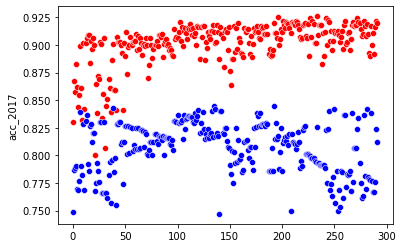

In [72]:
import seaborn as sns

ed_merge = ed_merge.sort_values("decoder_layers").reset_index(drop=True)
sns.scatterplot(
    data=ed_merge,
    x=ed_merge.index,
    y="acc_2017",
    color="red"
)
sns.scatterplot(
    data=ed_merge,
    x=ed_merge.index,
    y="acc_2023",
    color="blue"
)

<AxesSubplot:ylabel='acc_2017'>

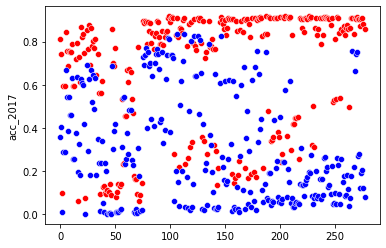

In [73]:
import seaborn as sns

dec_merge = dec_merge.sort_values("decoder_layers").reset_index(drop=True)
sns.scatterplot(
    data=dec_merge,
    x=dec_merge.index,
    y="acc_2017",
    color="red"
)
sns.scatterplot(
    data=dec_merge,
    x=dec_merge.index,
    y="acc_2023",
    color="blue"
)

# Hyperparams of best models

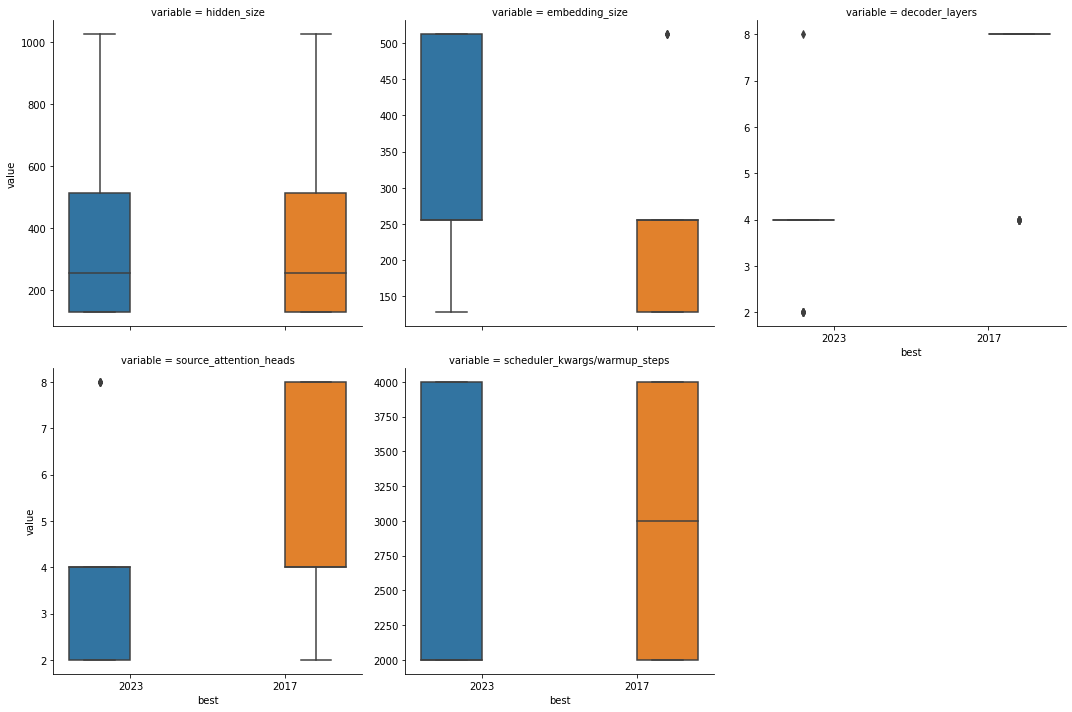

In [74]:
ed_melted = ed_merge.melt(
    id_vars=["acc_2023", "quintile_2023", "local_run_dir_2023", "acc_2017", "quintile_2017", "local_run_dir_2017"]
)
ed_melted["best"] = "None"
ed_melted.loc[ed_melted["quintile_2023"] == 1, "best"] = "2023"
ed_melted.loc[ed_melted["quintile_2017"] == 1, "best"] = "2017"
ed_melted = ed_melted.loc[ed_melted["best"].isin(["2017", "2023"])]
sns.catplot(
    data=ed_melted, x="best", y="value", hue="best",
    col="variable", kind="box", col_wrap=3,
    sharey=False
)

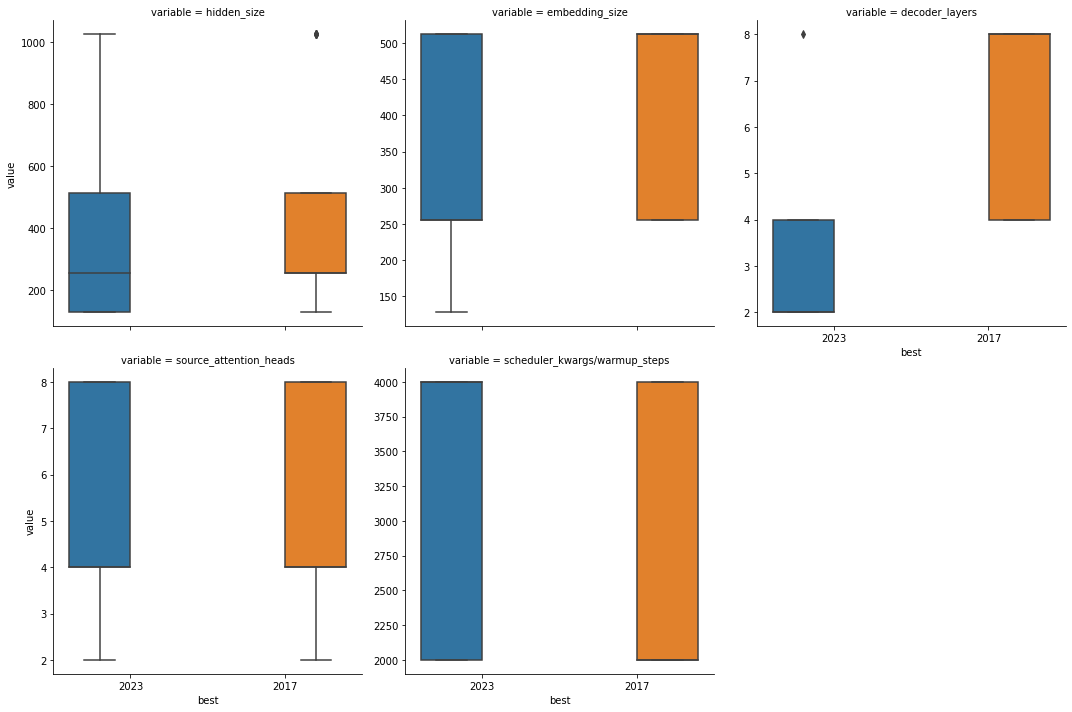

In [75]:
dec_melted = dec_merge.melt(
    id_vars=["acc_2023", "quintile_2023", "local_run_dir_2023", "acc_2017", "quintile_2017", "local_run_dir_2017"]
)
dec_melted["best"] = "None"
dec_melted.loc[dec_melted["quintile_2023"] == 1, "best"] = "2023"
dec_melted.loc[dec_melted["quintile_2017"] == 1, "best"] = "2017"
dec_melted = dec_melted.loc[dec_melted["best"].isin(["2017", "2023"])]
sns.catplot(
    data=dec_melted, x="best", y="value", hue="best",
    col="variable", kind="box", col_wrap=3,
    sharey=False
)

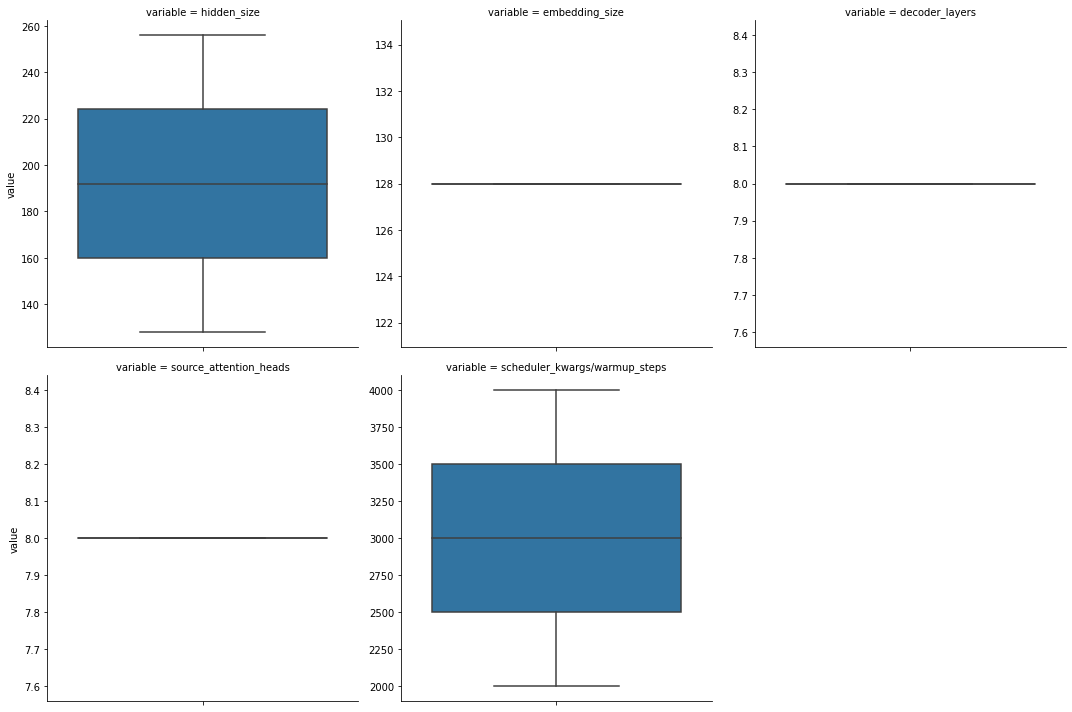

In [76]:
only_17_ed_melted = only_17_ed.melt(
    id_vars=["acc_2023", "quintile_2023", "local_run_dir_2023", "acc_2017", "quintile_2017", "local_run_dir_2017"]
)
sns.catplot(
    data=only_17_ed_melted, y="value",
    col="variable", kind="box", col_wrap=3,
    sharey=False
)

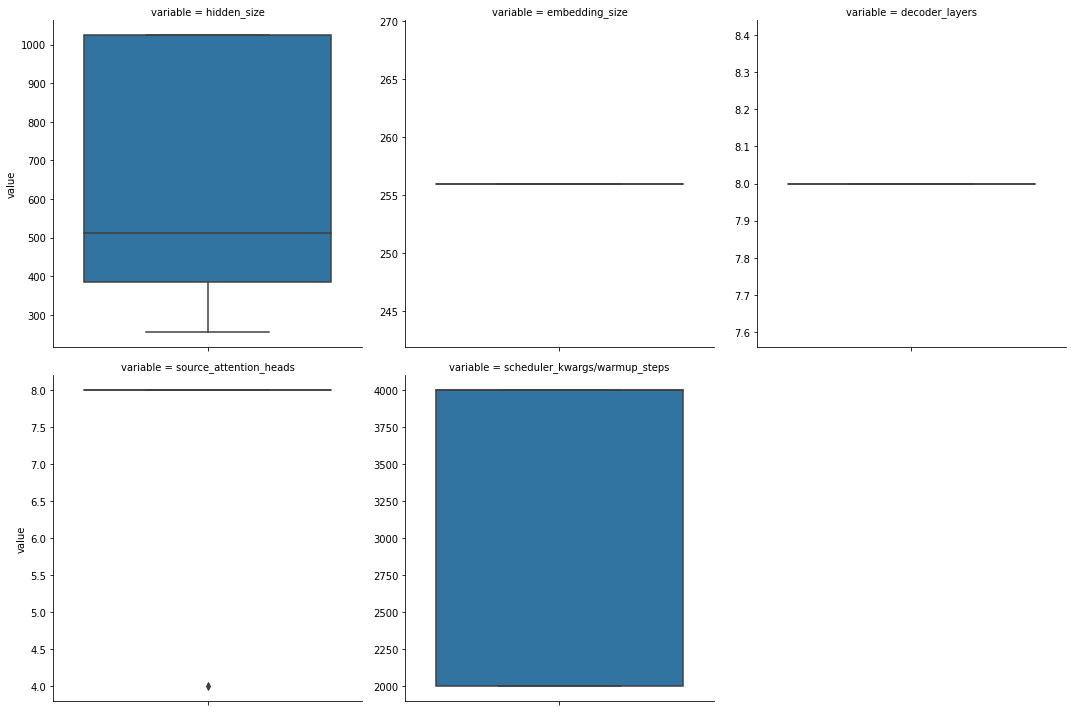

In [77]:
only_17_dec_melted = only_17_dec.melt(
    id_vars=["acc_2023", "quintile_2023", "local_run_dir_2023", "acc_2017", "quintile_2017", "local_run_dir_2017"]
)
sns.catplot(
    data=only_17_dec_melted, y="value",
    col="variable", kind="box", col_wrap=3,
    sharey=False
)

# TODO: Which hyperparams work poorly?

# How different are the bad 2023 performances from the good 2017 performances?

In [87]:
only_17_ed["acc_2017"] - only_17_ed["acc_2023"]

220    0.145
231    0.136
dtype: float64

In [88]:
only_17_dec["acc_2017"] - only_17_dec["acc_2023"]

195    0.788
201    0.746
203    0.745
261    0.754
262    0.770
263    0.765
268    0.772
dtype: float64

# Now we want to get preds for the following

In [86]:
print("ED")
for l in only_17_ed["local_run_dir_2023"]:
    print(l)

print("\nDECODER")
for l in only_17_dec["local_run_dir_2023"]:
    print(l)

ED
/rc_scratch/adwi9965/ed-results/deu.trn-sweep/sig-2023-ed-deu-sweep/version_107
/rc_scratch/adwi9965/ed-results/deu.trn-sweep/sig-2023-ed-deu-sweep/version_88

DECODER
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_273
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_249
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_247
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_296
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_297
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_298
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_274


# OLD, messy

In [5]:
bins = [0.0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ["WORST", "BAD", "FAIR", "GOOD", "BEST"]
dec_df_2017["binned"] = pd.cut(dec_df_2017["val_accuracy.max"], bins=bins, labels=labels)
dec_df_2017[["val_accuracy.max", "binned"]]

,val_accuracy.max,binned
0,0.911,BEST
1,0.777,GOOD
2,0.909,BEST
3,0.767,GOOD
4,0.645,FAIR
...,...,...
283,0.470,BAD
284,0.297,BAD
285,0.914,BEST
286,0.906,BEST


In [6]:
dec_df_2023["binned"] = pd.cut(dec_df_2023["val_accuracy.max"], bins=bins, labels=labels)
dec_df_2023[["val_accuracy.max", "binned"]]

,val_accuracy.max,binned
0,0.359,BAD
1,0.392,BAD
2,0.189,WORST
3,0.188,WORST
4,0.244,WORST
...,...,...
273,0.004,WORST
274,0.012,WORST
275,0.007,WORST
276,0.195,WORST


<AxesSubplot:>

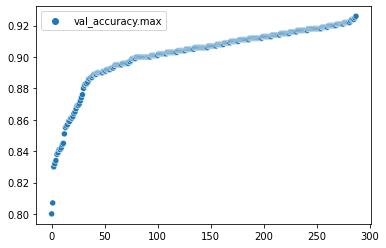

In [46]:
import seaborn as sns
sns.scatterplot(
    data=ed_df_2017[["val_accuracy.max"]].sort_values("val_accuracy.max").reset_index()[["val_accuracy.max"]],
)
# ed_df_2023["year"] = "2023"
# ed_df_2017["year"] = "2017"
# ed_both = pd.concat([ed_df_2023, ed_df_2017])
# sns.lineplot(
#     data=ed_both,
    
# )

In [48]:
ed_df_2017.loc[ed_df_2017["val_accuracy.max"] < 0.82]

,index,Name,val_accuracy.max,hidden_size,decoder_layers,embedding_size,source_attention_heads,scheduler_kwargs/warmup_steps,State,Notes,...,start_idx,target_vocab_size,teacher_forcing,epoch,lr-Adam,train_loss,trainer/global_step,val_loss,arch_name,binned
146,146,german-train-high,0.800,128,2,64,2,2000,finished,-,...,2,71,True,799,0.000316,0.968131,19999,1.039767,encoder-decoder,GOOD
166,166,german-train-high,0.807,128,2,64,2,4000,finished,-,...,2,71,True,799,0.000447,0.964411,19999,1.041409,encoder-decoder,GOOD


/Users/adamwiemerslage/python-envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adamwiemerslage/python-envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adamwiemerslage/python-envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


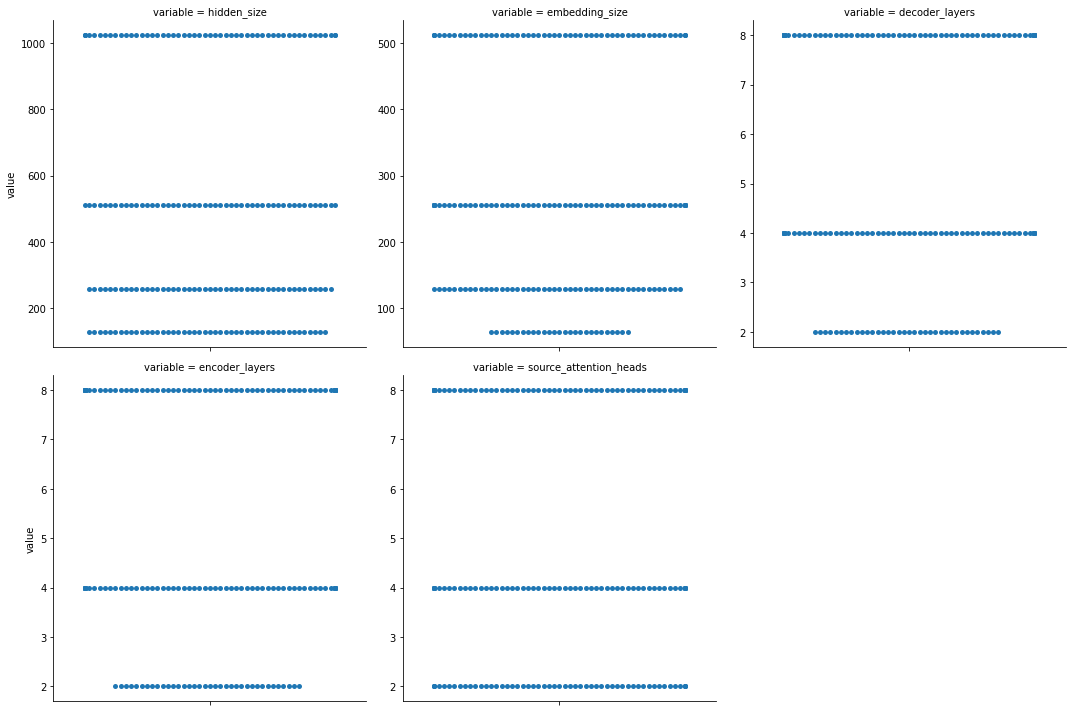

In [62]:
best_ed_2017 = ed_df_2017.loc[ed_df_2017["val_accuracy.max"] > 0.9]
hparams = best_ed_2017[["hidden_size", "embedding_size", "decoder_layers", "encoder_layers", "source_attention_heads"]]
m = hparams.melt()
sns.catplot(
    data=m, y="value", col="variable",
    kind="swarm", col_wrap=3, sharey=False
)

<AxesSubplot:>

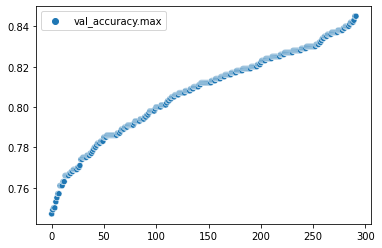

In [47]:
sns.scatterplot(
    data=ed_df_2023[["val_accuracy.max"]].sort_values("val_accuracy.max").reset_index()[["val_accuracy.max"]],
)

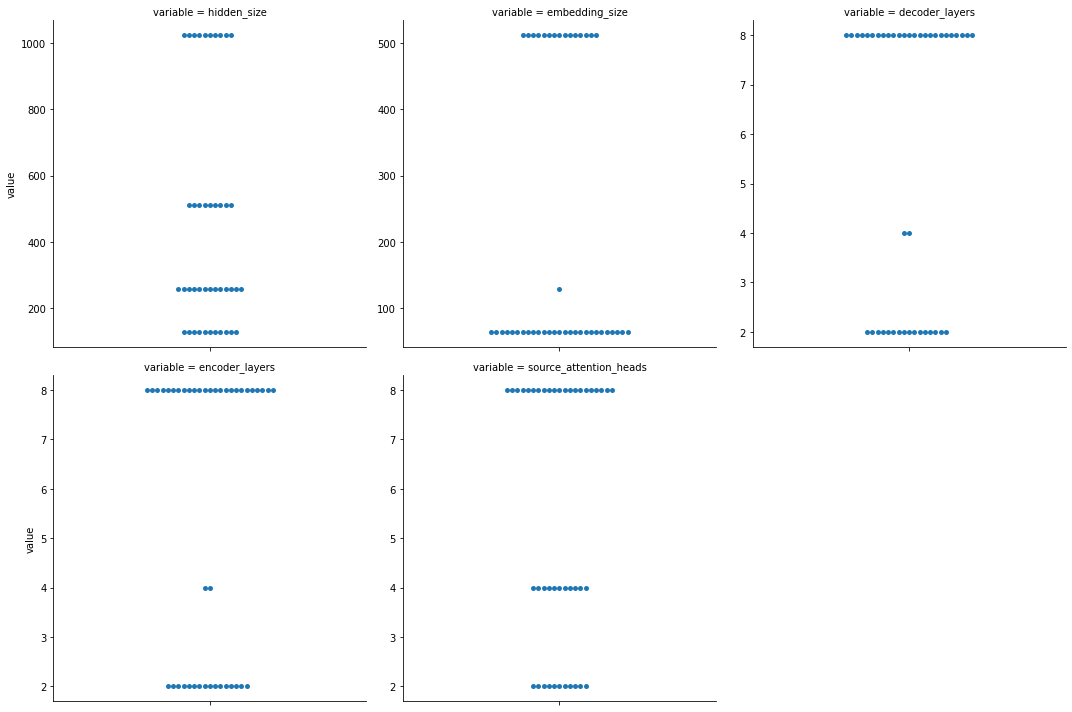

In [61]:
worst_ed_2023 = ed_df_2023.loc[ed_df_2023["val_accuracy.max"] < 0.78]
# worst_ed_2023
hparams = worst_ed_2023[["hidden_size", "embedding_size", "decoder_layers", "encoder_layers", "source_attention_heads"]]
m = hparams.melt()
sns.catplot(
    data=m, y="value", col="variable",
    kind="swarm", col_wrap=3, sharey=False
)

In [76]:
ed_bins = [0.0, 0.75, 0.8, 0.85, 0.9, 1.0]
ed_df_2023["binned"] = pd.cut(ed_df_2023["val_accuracy.max"], bins=ed_bins, labels=labels)
# print(ed_df_2023)
ed_df_2023[["val_accuracy.max", "binned"]]

,val_accuracy.max,binned
0,0.845,FAIR
1,0.845,FAIR
2,0.843,FAIR
3,0.842,FAIR
4,0.842,FAIR
...,...,...
287,0.753,BAD
288,0.750,WORST
289,0.750,WORST
290,0.749,WORST


In [77]:
ed_df_2017["binned"] = pd.cut(ed_df_2017["val_accuracy.max"], bins=ed_bins, labels=labels)
ed_df_2017[["val_accuracy.max", "binned"]]

,val_accuracy.max,binned
0,0.841,FAIR
1,0.916,BEST
2,0.915,BEST
3,0.900,GOOD
4,0.901,BEST
...,...,...
283,0.905,BEST
284,0.910,BEST
285,0.912,BEST
286,0.900,GOOD


In [80]:
worst_ed_df_2023 = ed_df_2023.loc[ed_df_2023["binned"] == "WORST"]
worst_ed_df_2023

,index,Name,val_accuracy.max,scheduler_kwargs/warmup_steps,hidden_size,embedding_size,decoder_layers,source_attention_heads,State,Notes,...,start_idx,target_vocab_size,teacher_forcing,epoch,lr-Adam,train_loss,trainer/global_step,val_loss,arch_name,binned
288,288,deu.trn,0.750,2000,1024,64,8,8,finished,-,...,2,65,True,799,0.000316,0.736611,19999,1.306598,encoder-decoder,WORST
289,289,deu.trn,0.750,4000,1024,64,8,8,finished,-,...,2,65,True,799,0.000447,0.736976,19999,1.318918,encoder-decoder,WORST
290,290,deu.trn,0.749,4000,256,64,2,2,finished,-,...,2,65,True,799,0.000447,0.883318,19999,1.159285,encoder-decoder,WORST
291,291,deu.trn,0.747,4000,128,64,4,4,crashed,-,...,2,65,True,203,0.000886,0.843512,5100,1.223151,encoder-decoder,WORST


In [82]:
best_ed_df_2017 = ed_df_2017.loc[ed_df_2017["binned"] == "BEST"]
best_ed_df_2017

,index,Name,val_accuracy.max,hidden_size,decoder_layers,embedding_size,source_attention_heads,scheduler_kwargs/warmup_steps,State,Notes,...,start_idx,target_vocab_size,teacher_forcing,epoch,lr-Adam,train_loss,trainer/global_step,val_loss,arch_name,binned
1,1,german-train-high,0.916,256,8,512,8,2000,finished,-,...,2,71,True,799,0.000316,0.751284,19999,0.866627,encoder-decoder,BEST
2,2,german-train-high,0.915,512,4,256,8,2000,finished,-,...,2,71,True,799,0.000316,0.745916,19999,0.860731,encoder-decoder,BEST
4,4,german-train-high,0.901,128,2,256,8,2000,finished,-,...,2,71,True,799,0.000316,0.758603,19999,0.877852,encoder-decoder,BEST
5,5,german-train-high,0.901,1024,2,256,2,2000,finished,-,...,2,71,True,799,0.000316,0.774749,19999,0.885229,encoder-decoder,BEST
6,6,german-train-high,0.917,256,4,512,8,4000,finished,-,...,2,71,True,799,0.000447,0.748420,19999,0.860805,encoder-decoder,BEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,german-train-high,0.917,512,4,256,8,4000,finished,-,...,2,71,True,799,0.000447,0.746033,19999,0.850919,encoder-decoder,BEST
283,283,german-train-high,0.905,512,4,256,2,2000,finished,-,...,2,71,True,799,0.000316,0.751174,19999,0.870291,encoder-decoder,BEST
284,284,german-train-high,0.910,1024,2,256,4,4000,finished,-,...,2,71,True,799,0.000447,0.756814,19999,0.875257,encoder-decoder,BEST
285,285,german-train-high,0.912,128,4,512,2,2000,finished,-,...,2,71,True,799,0.000316,0.755670,19999,0.845598,encoder-decoder,BEST


In [79]:
def is_same_config(df1, df2):
    config_feats = [
        "hidden_size", "embedding_size", "decoder_layers",
        "source_attention_heads", "scheduler_kwargs/warmup_steps"
    ]
    return all([df1[f] == df2[f] for f in config_feats])

In [83]:
pairs = []
for i, row1 in ed_df_2023.iterrows():
    for j, row2 in ed_df_2017.iterrows():
        if is_same_config(row1, row2):
            pairs.append((i, j))

In [84]:
WORST = "WORST"
BEST = "BEST"

bad_good = []
good_bad = []
for i, j in pairs:
    if ed_df_2023.iloc[i].binned == WORST and ed_df_2017.iloc[j].binned == BEST:
        bad_good.append((i, j))
    elif ed_df_2017.iloc[j].binned == WORST and ed_df_2023.iloc[i].binned == BEST:
        good_bad.append((i, j))
        
print(len(bad_good), len(good_bad))

2 0


In [85]:
config_feats = [
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps"
]
    
df_configs = [ed_df_2023.iloc[i] for i, j in bad_good]
ranges = {}
for f in config_feats:
    ranges[f] = [df[f] for df in df_configs]
    
ranges_df = pd.DataFrame(ranges)
ranges_df

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps
0,1024,64,8,8,2000
1,1024,64,8,8,4000


In [99]:
for idx, row in ed_df_2023.loc[
    (ed_df_2023["hidden_size"] == 1024) &
    (ed_df_2023["embedding_size"] == 64) &
    (ed_df_2023["decoder_layers"] == 8) &
    (ed_df_2023["source_attention_heads"] == 8)
].iterrows():
    print(row["local_run_dir"])

/rc_scratch/adwi9965/ed-results/deu.trn-sweep/sig-2023-ed-deu-sweep/version_70
/rc_scratch/adwi9965/ed-results/deu.trn-sweep/sig-2023-ed-deu-sweep/version_71


In [10]:
pairs = []
for i, row1 in dec_df_2023.iterrows():
    for j, row2 in dec_df_2017.iterrows():
        if is_same_config(row1, row2):
            pairs.append((i, j))

In [11]:
WORST = "WORST"
BEST = "BEST"

bad_good = []
good_bad = []
for i, j in pairs:
    if dec_df_2023.iloc[i].binned == WORST and dec_df_2017.iloc[j].binned == BEST:
        bad_good.append((i, j))
    elif dec_df_2017.iloc[j].binned == WORST and dec_df_2023.iloc[i].binned == BEST:
        good_bad.append((i, j))
        
print(len(bad_good), len(good_bad))

27 0


In [12]:
dec_df_2023.loc[dec_df_2023["binned"] == WORST]

,index,Name,val_accuracy.max,source_attention_heads,hidden_size,embedding_size,scheduler_kwargs/warmup_steps,decoder_layers,State,Notes,...,teacher_forcing,val_out,lr-Adam,train_loss,trainer/global_step,val_loss,epoch,encoder_layers,arch_name,binned
2,4,comfy-mountain-372,0.189,8,512,512,4000,8,finished,-,...,True,validation_preds,0.000447,0.740821,19999,3.807900,799,1,decoder-only,WORST
3,5,swept-disco-371,0.188,8,512,512,2000,8,finished,-,...,True,validation_preds,0.000316,0.737368,19999,3.912144,799,1,decoder-only,WORST
4,6,smart-dawn-370,0.244,4,512,512,4000,8,finished,-,...,True,validation_preds,0.000447,0.742339,19999,3.961245,799,1,decoder-only,WORST
6,8,ancient-glitter-368,0.241,2,512,512,4000,8,finished,-,...,True,validation_preds,0.000447,0.747405,19999,4.011558,799,1,decoder-only,WORST
7,9,ancient-plant-367,0.240,2,512,512,2000,8,finished,-,...,True,validation_preds,0.000316,0.742253,19999,3.659665,799,1,decoder-only,WORST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,367,decent-sun-8,0.004,8,128,64,2000,2,finished,-,...,True,validation_preds,0.000316,1.593283,19999,3.558926,799,1,decoder-only,WORST
274,368,hardy-plasma-7,0.012,4,128,64,4000,2,finished,-,...,True,validation_preds,0.000447,1.609360,19999,3.286614,799,1,decoder-only,WORST
275,369,fragrant-moon-6,0.007,4,128,64,2000,2,finished,-,...,True,validation_preds,0.000316,1.624288,19999,3.390200,799,1,decoder-only,WORST
276,370,legendary-disco-5,0.195,2,128,64,4000,2,finished,-,...,True,validation_preds,0.000447,1.559099,19999,2.431305,799,1,decoder-only,WORST


In [13]:
config_feats = [
    "hidden_size", "embedding_size", "decoder_layers",
    "source_attention_heads", "scheduler_kwargs/warmup_steps"
]
    
df_configs = [dec_df_2023.iloc[i] for i, j in bad_good]
ranges = {}
for f in config_feats:
    ranges[f] = [df[f] for df in df_configs]
    
ranges_df = pd.DataFrame(ranges)
ranges_df

,hidden_size,embedding_size,decoder_layers,source_attention_heads,scheduler_kwargs/warmup_steps
0,512,512,8,8,4000
1,512,512,8,8,2000
2,512,512,8,4,4000
3,512,512,8,2,4000
4,512,512,8,2,2000
5,256,512,8,8,4000
6,256,512,8,8,2000
7,128,512,8,8,4000
8,128,512,8,8,2000
9,1024,256,8,8,4000


<AxesSubplot:xlabel='variable', ylabel='value'>

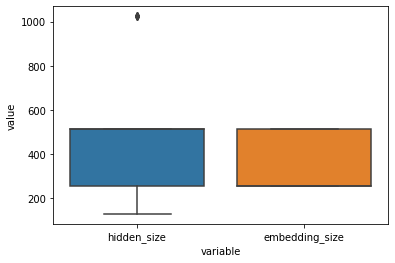

In [14]:
import seaborn as sns

melted = pd.melt(ranges_df)
sns.boxplot(melted.loc[melted["variable"].isin(["embedding_size", "hidden_size"])], x="variable", y="value")

<AxesSubplot:xlabel='variable', ylabel='value'>

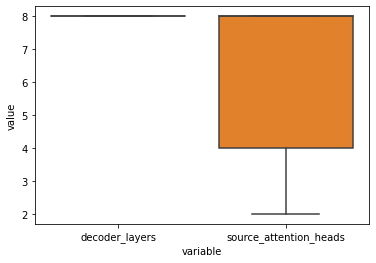

In [15]:
sns.boxplot(melted.loc[melted["variable"].isin(["decoder_layers", "source_attention_heads"])], x="variable", y="value")

In [16]:
print(len(dec_df_2023.loc[dec_df_2023["decoder_layers"] == 8]))
print(min(dec_df_2023["embedding_size"]), max(dec_df_2023["embedding_size"]))
print(min(dec_df_2023["hidden_size"]), max(dec_df_2023["hidden_size"]))

90
64 512
128 1024


<AxesSubplot:xlabel='binned', ylabel='counts'>

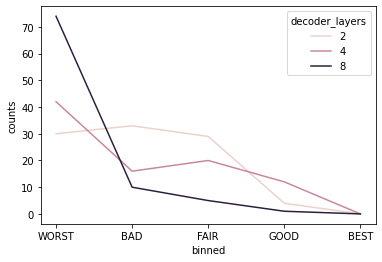

In [17]:
from collections import Counter

labels = ["WORST", "BAD", "FAIR", "GOOD", "BEST"]
aggs = []
for decoder_layers in set(dec_df_2023["decoder_layers"]):
    x = dec_df_2023.loc[
        dec_df_2023["decoder_layers"] == decoder_layers
    ].groupby(["binned"])["binned"].count().reset_index(name='counts')
    x["decoder_layers"] = decoder_layers
    aggs.append(x)
counts_df = pd.concat(aggs)
counts_df
sns.lineplot(counts_df, x="binned", y="counts", hue="decoder_layers")

<AxesSubplot:xlabel='binned', ylabel='counts'>

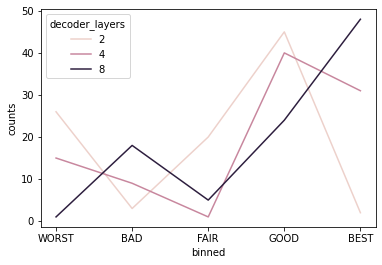

In [18]:
from collections import Counter

labels = ["WORST", "BAD", "FAIR", "GOOD", "BEST"]
aggs = []
for decoder_layers in set(dec_df_2017["decoder_layers"]):
    x = dec_df_2017.loc[
        dec_df_2017["decoder_layers"] == decoder_layers
    ].groupby(["binned"])["binned"].count().reset_index(name='counts')
    x["decoder_layers"] = decoder_layers
    aggs.append(x)
counts_df = pd.concat(aggs)
counts_df
sns.lineplot(counts_df, x="binned", y="counts", hue="decoder_layers")

  binned  counts  decoder_layers
0  WORST       0               8
1    BAD       0               8
2   FAIR       2               8
3   GOOD      94               8
4   BEST       0               8
0  WORST       0               2
1    BAD       0               2
2   FAIR       1               2
3   GOOD      96               2
4   BEST       0               2
0  WORST       0               4
1    BAD       0               4
2   FAIR       1               4
3   GOOD      98               4
4   BEST       0               4


<AxesSubplot:xlabel='binned', ylabel='counts'>

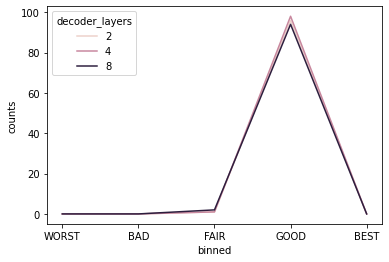

In [19]:
from collections import Counter

labels = ["WORST", "BAD", "FAIR", "GOOD", "BEST"]
aggs = []
for decoder_layers in set(ed_df_2023["decoder_layers"]):
    x = ed_df_2023.loc[
        ed_df_2023["decoder_layers"] == decoder_layers
    ].groupby(["binned"])["binned"].count().reset_index(name='counts')
    x["decoder_layers"] = decoder_layers
    aggs.append(x)
counts_df = pd.concat(aggs)
print(counts_df)
sns.lineplot(counts_df, x="binned", y="counts", hue="decoder_layers")

<AxesSubplot:xlabel='binned', ylabel='counts'>

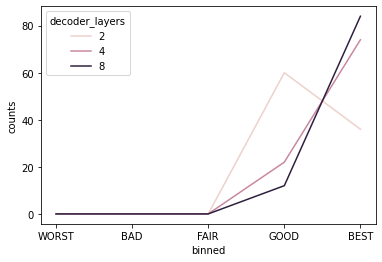

In [20]:
from collections import Counter

labels = ["WORST", "BAD", "FAIR", "GOOD", "BEST"]
aggs = []
for decoder_layers in set(ed_df_2017["decoder_layers"]):
    x = ed_df_2017.loc[
        ed_df_2017["decoder_layers"] == decoder_layers
    ].groupby(["binned"])["binned"].count().reset_index(name='counts')
    x["decoder_layers"] = decoder_layers
    aggs.append(x)
counts_df = pd.concat(aggs)
counts_df
sns.lineplot(counts_df, x="binned", y="counts", hue="decoder_layers")

<AxesSubplot:xlabel='decoder_layers', ylabel='val_accuracy.max'>

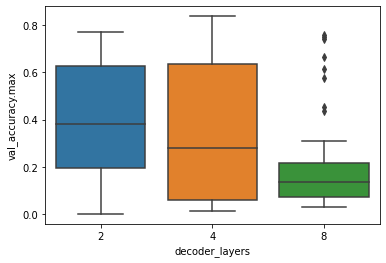

In [21]:
sns.boxplot(dec_df_2023, x="decoder_layers", y="val_accuracy.max")

<AxesSubplot:xlabel='decoder_layers', ylabel='val_accuracy.max'>

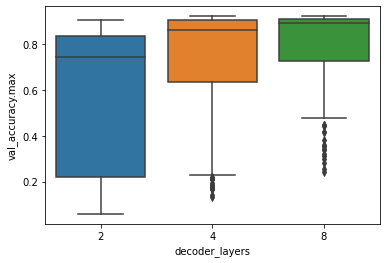

In [22]:
sns.boxplot(dec_df_2017, x="decoder_layers", y="val_accuracy.max")

<AxesSubplot:xlabel='decoder_layers', ylabel='val_accuracy.max'>

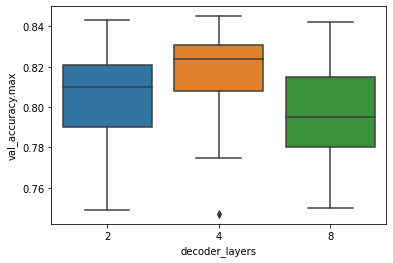

In [23]:
sns.boxplot(ed_df_2023, x="decoder_layers", y="val_accuracy.max")

<AxesSubplot:xlabel='decoder_layers', ylabel='val_accuracy.max'>

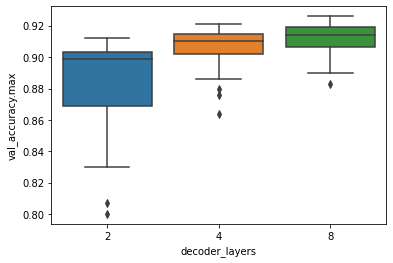

In [24]:
sns.boxplot(ed_df_2017, x="decoder_layers", y="val_accuracy.max")

In [25]:
set(dec_df_2023["decoder_layers"])

{2, 4, 8}

In [26]:
counts = Counter(dec_df_2023.loc[
    (dec_df_2023["decoder_layers"] == 4)
].binned.tolist())

dist = {l: counts.get(l, 0)/sum(counts.values()) for l in labels}
dist

{'WORST': 0.4666666666666667,
 'BAD': 0.17777777777777778,
 'FAIR': 0.2222222222222222,
 'GOOD': 0.13333333333333333,
 'BEST': 0.0}

In [27]:
counts = Counter(dec_df_2023.loc[
    (dec_df_2023["decoder_layers"] == 2)
].binned.tolist())

dist = {l: counts.get(l, 0)/sum(counts.values()) for l in labels}
dist

{'WORST': 0.30612244897959184,
 'BAD': 0.336734693877551,
 'FAIR': 0.29591836734693877,
 'GOOD': 0.04081632653061224,
 'BEST': 0.0}

In [28]:
df_configs = [dec_df_2023.iloc[i] for i, j in bad_good]
for df in df_configs:
    print(df["local_run_dir"])

/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_370
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_369
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_368
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_366
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_365
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_362
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_360
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_322
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_321
/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_298


In [35]:
thisdf = dec_df_2023.loc[
    dec_df_2023["local_run_dir"] == "/rc_scratch/adwi9965/decoder-only-results/deu.trn-sweep/sig-2023-decoder-only-deu-sweep/version_370"
]

thisdf.T

,2
index,4
Name,comfy-mountain-372
val_accuracy.max,0.189
source_attention_heads,8
hidden_size,512
embedding_size,512
scheduler_kwargs/warmup_steps,4000
decoder_layers,8
State,finished
Notes,-


[(0.0, 1.0)]

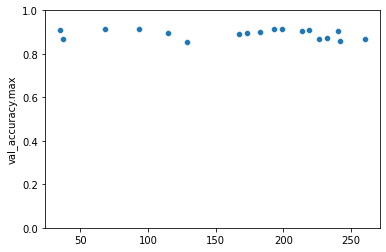

In [92]:
def x(df):
    return df.loc[
        (df["hidden_size"] == 1024) &
        (df["embedding_size"] == 64)   
    ]
    
g = sns.scatterplot(x(ed_df_2017)["val_accuracy.max"])
g.set(ylim=((0, 1.0)))

[(0.0, 1.0)]

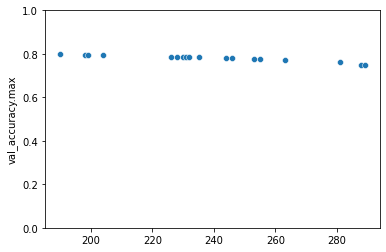

In [93]:
g = sns.scatterplot(x(ed_df_2023)["val_accuracy.max"])
g.set(ylim=((0, 1.0)))

[(0.0, 1.0)]

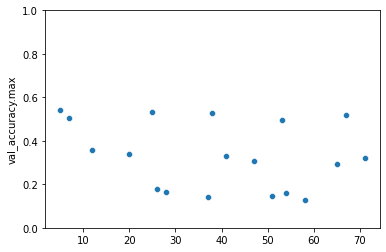

In [94]:
g = sns.scatterplot(x(dec_df_2017)["val_accuracy.max"])
g.set(ylim=((0, 1.0)))

[(0.0, 1.0)]

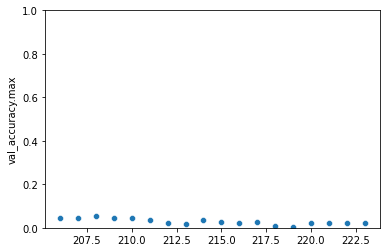

In [95]:
g = sns.scatterplot(x(dec_df_2023)["val_accuracy.max"])
g.set(ylim=((0, 1.0)))